In [69]:
#import the packages
import nltk
import re

# importing the guttenburg package
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

#call Anna K from Gutenberg Library
test_set = strip_headers(load_etext(1399)).strip()

#Split the Sentences into Tokens
TextToken = nltk.sent_tokenize(test_set)
TextToken = TextToken[2:] # Removes unrelated text at the front about the Gutenberg Project
print(TextToken[:5])
SentTokens = [nltk.word_tokenize(sent) for sent in TextToken] #Tokenize each word in the sentence
print(SentTokens[:5])
test_set = SentTokens

# To Save Memory, removing the additional data sets
del TextToken
del SentTokens

['The wife had\r\ndiscovered that the husband was carrying on an intrigue with a French\r\ngirl, who had been a governess in their family, and she had announced\r\nto her husband that she could not go on living in the same house with\r\nhim.', 'This position of affairs had now lasted three days, and not only\r\nthe husband and wife themselves, but all the members of their family\r\nand household, were painfully conscious of it.', 'Every person in the\r\nhouse felt that there was no sense in their living together, and that\r\nthe stray people brought together by chance in any inn had more in\r\ncommon with one another than they, the members of the family and\r\nhousehold of the Oblonskys.', 'The wife did not leave her own room, the\r\nhusband had not been at home for three days.', 'The children ran wild all\r\nover the house; the English governess quarreled with the housekeeper,\r\nand wrote to a friend asking her to look out for a new situation for\r\nher; the man-cook had walked off t

In [70]:
#Read in the first Corpus

File = open('J:\My Drive\Graduate School\IST664 Natural Language Processing\Homework Corpus\Anna Karenina by Leo Tolestoy.txt', encoding = 'utf8')
test_set = File.read()
File.close()
test_set[:150]

#Split the Sentences into Tokens
TextToken = nltk.sent_tokenize(test_set)
TextToken = TextToken[2:] # Removes unrelated text at the front about the Gutenberg Project
print(TextToken[:5])
SentTokens = [nltk.word_tokenize(sent) for sent in TextToken] #Tokenize each word in the sentence
print(SentTokens[:5])
test_set = SentTokens

# To Save Memory, removing the additional data sets
del TextToken
del SentTokens

['[Illustration]\n\n\n\n\n ANNA KARENINA \n\n by Leo Tolstoy \n\n Translated by Constance Garnett \n\nContents\n\n\n PART ONE\n PART TWO\n PART THREE\n PART FOUR\n PART FIVE\n PART SIX\n PART SEVEN\n PART EIGHT\n\n\n\n\nPART ONE\n\nChapter 1\n\n\nHappy families are all alike; every unhappy family is unhappy in its\nown way.', 'Everything was in confusion in the Oblonskys’ house.', 'The wife had\ndiscovered that the husband was carrying on an intrigue with a French\ngirl, who had been a governess in their family, and she had announced\nto her husband that she could not go on living in the same house with\nhim.', 'This position of affairs had now lasted three days, and not only\nthe husband and wife themselves, but all the members of their family\nand household, were painfully conscious of it.', 'Every person in the\nhouse felt that there was no sense in their living together, and that\nthe stray people brought together by chance in any inn had more in\ncommon with one another than they,

In [71]:
#using the Airline Services dataset for training on sentiment polarity
import pandas as pd
train_dataset = pd.read_csv('train_tweets_airlines.csv')
#displaying the dataset using pandas
display(len(train_dataset))
display(train_dataset.head(2))

14640

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [72]:
# Since this is social media data, we will have to add a few extra preprocessing steps
# First, let's remove  @ and # (Twitter platform affordances) from the training data
# We'll use regular expressions for that, creating a Function that we can use to pass the data through
# NOTE: you could add more regexes to clean noisy characters such as emoticons, numbers, etc
def remove_at(x):
    x = str(x).replace('@', '')
    x = str(x).replace('#', '')
    return x

In [73]:
#applying the clearning function and visualizing the result
train_dataset['text'] = train_dataset['text'].apply(lambda x: remove_at(x))
display(len(train_dataset))
display(train_dataset['text'].head(5))

14640

0                    VirginAmerica What dhepburn said.
1    VirginAmerica plus you've added commercials to...
2    VirginAmerica I didn't today... Must mean I ne...
3    VirginAmerica it's really aggressive to blast ...
4    VirginAmerica and it's a really big bad thing ...
Name: text, dtype: object

In [74]:
#EXPLORATORY ANAYSIS
#Checking if the dataset is balanced
#extracting types of labels from the 'airline_sentiment' column in the dataset
PosSentences = train_dataset[train_dataset['airline_sentiment'] == 'positive']
NegSentences = train_dataset[train_dataset['airline_sentiment'] == 'negative']
NeuSentences = train_dataset[train_dataset['airline_sentiment'] == 'neutral']

#grouping all labels to find out the count for each group
label_groups = train_dataset.groupby('airline_sentiment').size().reset_index(name='counts')
display(label_groups.head(5))

,airline_sentiment,counts
0,negative,9178
1,neutral,3099
2,positive,2363


In [75]:
train_dataset['airline_sentiment'].value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [76]:
weights = {'negative':1, 'neutral':3, 'positive':4}
train_dataset['weights'] = train_dataset['airline_sentiment'].apply(lambda x: weights[x])
train_dataset['weights'].head()

0    3
1    4
2    3
3    1
4    1
Name: weights, dtype: int64

In [77]:
train_dataset = train_dataset.sample(n = 18000, weights=train_dataset['weights'], replace= True, random_state=24)
train_dataset = train_dataset.reset_index()
train_dataset['airline_sentiment'].value_counts()

positive    6081
neutral     5967
negative    5952
Name: airline_sentiment, dtype: int64

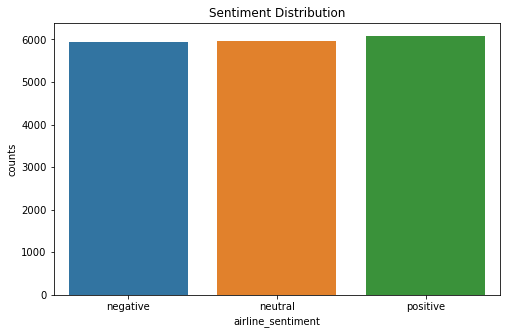

In [78]:
#Visualizing label group data within training dataset
# NOTE that the dataset is unbalanced
# please come up with strategies to balance this dataset
# if not, explain how that affect your results
# if using unbalanced dataset, please provide MicroAverage evaluation scores from your classifier

import matplotlib.pyplot as plt
import seaborn as sns

label_groups = train_dataset.groupby('airline_sentiment').size().reset_index(name='counts')
plt.figure(figsize=(8,5))
ax = sns.barplot(x="airline_sentiment", y="counts", data=label_groups)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title(label="Sentiment Distribution")
plt.show()

In [79]:
# tokenizing using RegexTokenizer for tokenizing using specific regular expressions
# in our case, we eliminate Twitter's noise by picking up only alphabets and numbers
# indicated by the 'w', the regex alias for 'word'

import nltk

tokenizer = nltk.RegexpTokenizer('\w+')
doc = train_dataset['text'].apply(lambda x : tokenizer.tokenize(x))
display(len(doc))
display(doc.head(5))

18000

0    [AmericanAir, You, could, only, get, us, on, a...
1    [USAirways, trying, to, book, award, travel, l...
2    [AmericanAir, you, have, my, money, you, chang...
3    [united, thanks, for, making, sure, they, hear...
4    [SouthwestAir, thanks, What, s, your, opinion,...
Name: text, dtype: object

In [80]:
#BEGGINING TO WORK ON THE CLASSIFICATION TASK
# extracting the tweet message and its asigned sentiment label
# we do this by creating a Python list
# our list will have the tweet's tokens and corresponding sentiments

# opening a list to store our data
docs = []

# iterating over the dataset and extracting the information sought
for i in range(0, len(train_dataset['airline_sentiment'])):
    # appending the info to the list
    docs.append((doc[i], train_dataset['airline_sentiment'][i]))

#printing the output for validation
docs[0]

(['AmericanAir',
  'You',
  'could',
  'only',
  'get',
  'us',
  'on',
  'a',
  'flight',
  '30',
  'minutes',
  'before',
  'the',
  'funeral',
  'starts',
  'We',
  're',
  'stranded',
  'in',
  'Dallas',
  'w',
  'o',
  'luggage',
  'for',
  '2',
  'days'],
 'negative')

In [81]:
    
# The dataset is sorted by sentiment label
# so we need to randomize it to avoid sampling biases 

#importing the random library
import random

#shuffling the documents
random.shuffle(docs)

In [82]:
#defining set of words that will be used for features
#we'll find the 2000 most common words and used them as an important feature of the whole corpus

all_words = [word for (sentance,category) in docs for word in sentance]
top_words = nltk.FreqDist(all_words)
most_common_words = top_words.most_common(2000)
word_features = [word for (word,count) in most_common_words]

In [83]:
#checking if we have the 2000 words we need
len(set(all_words))

13972

In [84]:
#now we will use that list of most frequent words in the entire corpus
#to iterate over each sentence and check if any of those words are present
#in that way, we will see if this unigram corpus feature is present on that particular sentence
#using Boolean logic that matches values and returns 'True' or 'False'
#we do this by defining a Python "function," i.e.a piece of code writen to be reused
def document_features(document, word_features):
    document_words = set(document)
    #we open a Pytnon dictionary instead of a list
    features = {}
    for word in word_features:
        #checking if the word from word_features matches a word in the document
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [85]:
#now we apply the function to the document dataset
featuresets = [(document_features(d, word_features), c) for (d, c) in docs]

#we print the list of features matches for the first document ([0]) in the corpus
#we'll see a Python dictionary with the key being the feature word
#and the value being 'True' or 'False' according to that word being matched in the present document or not
#we'll se a lot of 'False' values because (of course) not all 2000 words will be on each sentence!
featuresets[0]

({'contains(to)': True,
  'contains(I)': False,
  'contains(the)': True,
  'contains(you)': True,
  'contains(a)': False,
  'contains(for)': False,
  'contains(united)': False,
  'contains(on)': False,
  'contains(t)': False,
  'contains(and)': False,
  'contains(SouthwestAir)': False,
  'contains(JetBlue)': True,
  'contains(flight)': False,
  'contains(my)': False,
  'contains(AmericanAir)': True,
  'contains(USAirways)': False,
  'contains(in)': True,
  'contains(is)': True,
  'contains(it)': False,
  'contains(of)': False,
  'contains(me)': False,
  'contains(s)': False,
  'contains(co)': False,
  'contains(http)': False,
  'contains(have)': False,
  'contains(with)': False,
  'contains(was)': False,
  'contains(that)': False,
  'contains(your)': False,
  'contains(at)': False,
  'contains(from)': True,
  'contains(can)': True,
  'contains(get)': False,
  'contains(be)': False,
  'contains(this)': False,
  'contains(not)': False,
  'contains(Thanks)': False,
  'contains(but)': Fals

In [86]:
#checking the length of the list of features
len(featuresets)

18000

In [87]:
#We are ready now to do machine learning using the unigram list we just created
#we use a Naive Bayes classifier with 5-fold cross validation for training on sentiments using unigrams

import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10)
sum = 0

for train, test in kf.split(featuresets):
    train_data = np.array(featuresets)[train]
    test_data = np.array(featuresets)[test]
    classifier = nltk.NaiveBayesClassifier.train(train_data)
    sum += nltk.classify.accuracy(classifier, test_data)

#storing the score in a variable 
acc1 = sum/10

In [88]:
#let's see the accuracy score for this unigram classifier

acc1

0.7695000000000001

In [89]:
# We will now create a new feature: bigrams
#we'll use the code we already know from class labs 

from nltk.collocations import *
import re

#data cleaning and preprocessing
stopwords = nltk.corpus.stopwords.words('english')

def alpha(w):
    pattern = re.compile('^[^a-z]+$')
    if(pattern.match(w)):
        return True
    else:
        return False

#creating bigrams features for the corpus and applying cleaning steps
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_words)
finder.apply_word_filter(alpha)
finder.apply_word_filter(lambda w: w in stopwords)
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored[:10]

[(('customer', 'service'), 0.001836721137239272),
 (('Cancelled', 'Flightled'), 0.0015145476285372658),
 (('Late', 'Flight'), 0.0007008104158363226),
 (('JetBlue', 'Our'), 0.0006842035339444666),
 (('Our', 'fleet'), 0.0006775607811877242),
 (('fleek', 'http'), 0.0006709180284309818),
 (('Cancelled', 'Flighted'), 0.0005845622425933307),
 (('JetBlue', 'thanks'), 0.0005114919622691643),
 (('Booking', 'Problems'), 0.0004982064567556796),
 (('united', 'thanks'), 0.0004915637039989371)]

In [90]:
#extracting clean bigrams (no frequency information)
bigram_features = [bigram for (bigram, count) in scored[:2000]]
#printing the first 30 for confirmation
bigram_features[:30]

[('customer', 'service'),
 ('Cancelled', 'Flightled'),
 ('Late', 'Flight'),
 ('JetBlue', 'Our'),
 ('Our', 'fleet'),
 ('fleek', 'http'),
 ('Cancelled', 'Flighted'),
 ('JetBlue', 'thanks'),
 ('Booking', 'Problems'),
 ('united', 'thanks'),
 ('Cancelled', 'Flight'),
 ('SouthwestAir', 'thanks'),
 ('AmericanAir', 'thanks'),
 ('Late', 'Flightr'),
 ('Flight', 'Booking'),
 ('USAirways', 'AmericanAir'),
 ('SouthwestAir', 'Thanks'),
 ('united', 'thank'),
 ('gate', 'agent'),
 ('USAirways', 'thanks'),
 ('united', 'Thanks'),
 ('JetBlue', 'thank'),
 ('SouthwestAir', 'thank'),
 ('flight', 'attendant'),
 ('great', 'flight'),
 ('Thanks', 'united'),
 ('You', 'guys'),
 ('JetBlue', 'Thanks'),
 ('get', 'home'),
 ('Thanks', 'SouthwestAir')]

In [91]:
#after finding all bigrams of the corpus (i.e. the bigram feature of the corpus)
#we create a function that checks if those feature bigrams are present on each specific document
#exactly as we did with unigrams

def bi_document_features(document, bigram_features):
    document_words = list(nltk.bigrams(document))
    features = {}
    for word in bigram_features:
        #boolean logic will retunt 'True' if there is a match, or 'False' if not
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [92]:
#applying the function to our documents
featuresets2 = [(bi_document_features(d, bigram_features), c) for (d, c) in docs]

#seeing the featureset for the first document
featuresets2[0]

({"contains(('customer', 'service'))": False,
  "contains(('Cancelled', 'Flightled'))": False,
  "contains(('Late', 'Flight'))": False,
  "contains(('JetBlue', 'Our'))": False,
  "contains(('Our', 'fleet'))": False,
  "contains(('fleek', 'http'))": False,
  "contains(('Cancelled', 'Flighted'))": False,
  "contains(('JetBlue', 'thanks'))": False,
  "contains(('Booking', 'Problems'))": False,
  "contains(('united', 'thanks'))": False,
  "contains(('Cancelled', 'Flight'))": False,
  "contains(('SouthwestAir', 'thanks'))": False,
  "contains(('AmericanAir', 'thanks'))": False,
  "contains(('Late', 'Flightr'))": False,
  "contains(('Flight', 'Booking'))": False,
  "contains(('USAirways', 'AmericanAir'))": False,
  "contains(('SouthwestAir', 'Thanks'))": False,
  "contains(('united', 'thank'))": False,
  "contains(('gate', 'agent'))": False,
  "contains(('USAirways', 'thanks'))": False,
  "contains(('united', 'Thanks'))": False,
  "contains(('JetBlue', 'thank'))": False,
  "contains(('Southw

In [93]:
#checking the length of the featureset
#it should be the same than unigram, because we processed number of documents
#this is for verification
len(featuresets2)

18000

In [94]:
#how we run the classifier to see if we get a good accuracy score
#all this is just to find out which feature is more informative to predict sentiment
#Naive Bayes classifier with 5-fold cross validation for training on sentiments using bigram features

kf = KFold(n_splits = 10)
sum = 0

for train, test in kf.split(featuresets2):
    train_data2 = np.array(featuresets2)[train]
    test_data2 = np.array(featuresets2)[test]
    classifier2 = nltk.NaiveBayesClassifier.train(train_data2)
    sum += nltk.classify.accuracy(classifier2, test_data2)

acc2 = sum/10

In [95]:
#accuracy of classifier2, bigrams

acc2

0.6092222222222221

# Classifier

In [96]:
# determining the sentiments of the 1/4th of the comments using classifier1
# for debugging purposes, we use only 1/100 of the corpus
# but for the final experiment you should use at least 1/4 of it
# NOTE: WITH 1/4 OF THE SAMPLE THIS CODE TAKES 2 HOURS TO RUN

#creating emply lists to append the tweets to
pos_sent = []
neg_sent = []
neu_sent = []

#and total values of positive, negative or neutral tweets
#all these lists will end up as columns in our csv file, created later on
total_pos = []
total_neg = []
total_neu = []

sentences = test_set
    #opening the counter to add up positive, negative, or neutral according to predicted labels
pos_count = 0
neg_count = 0
neu_count = 0
#using our first classifier, the one trained with unigram features
for sents in sentences:
    senti = classifier.classify(document_features(sents, word_features))
    #adding items to the counter as they are classified
    if senti == 'positive':
        pos_sent.append(sents)
        pos_count += 1

    elif senti == 'negative':
        neg_sent.append(sents)
        neg_count += 1
    
    else:
        neu_sent.append(sents)
        neu_count += 1

    #appending the totals
    total_pos.append(pos_count)
    total_neg.append(neg_count)
    total_neu.append(neu_count)

In [97]:
#how many positive sentiment sentences did we predict?
len(pos_sent)


5635

In [98]:
#and how many negative sentiment ones?
len(neg_sent)

6836

In [99]:
#what about neutral?
len(neu_sent)

4433

In [100]:
#We tokenize and attach POS to each sentence in the Positive Sentences list
tags_pos = [nltk.pos_tag(token) for token in pos_sent]

In [101]:
#same for Negative Sentences

tags_neg = [nltk.pos_tag(token) for token in neg_sent]

In [102]:
tags_neu = [nltk.pos_tag(token) for token in neu_sent]

In [103]:
#let's check that everything is okay. We print the first 3 Negative sentences
print(tags_neg[:3])

[[('The', 'DT'), ('wife', 'NN'), ('had', 'VBD'), ('discovered', 'VBN'), ('that', 'IN'), ('the', 'DT'), ('husband', 'NN'), ('was', 'VBD'), ('carrying', 'VBG'), ('on', 'IN'), ('an', 'DT'), ('intrigue', 'NN'), ('with', 'IN'), ('a', 'DT'), ('French', 'JJ'), ('girl', 'NN'), (',', ','), ('who', 'WP'), ('had', 'VBD'), ('been', 'VBN'), ('a', 'DT'), ('governess', 'NN'), ('in', 'IN'), ('their', 'PRP$'), ('family', 'NN'), (',', ','), ('and', 'CC'), ('she', 'PRP'), ('had', 'VBD'), ('announced', 'VBN'), ('to', 'TO'), ('her', 'PRP$'), ('husband', 'NN'), ('that', 'IN'), ('she', 'PRP'), ('could', 'MD'), ('not', 'RB'), ('go', 'VB'), ('on', 'IN'), ('living', 'NN'), ('in', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('house', 'NN'), ('with', 'IN'), ('him', 'PRP'), ('.', '.')], [('This', 'DT'), ('position', 'NN'), ('of', 'IN'), ('affairs', 'NNS'), ('had', 'VBD'), ('now', 'RB'), ('lasted', 'VBN'), ('three', 'CD'), ('days', 'NNS'), (',', ','), ('and', 'CC'), ('not', 'RB'), ('only', 'RB'), ('the', 'DT'), ('husband

In [104]:
#what about the first 3 positive ones...
print(tags_pos[:3])

[[('[', 'JJ'), ('Illustration', 'NNP'), (']', 'NNP'), ('ANNA', 'NNP'), ('KARENINA', 'NNP'), ('by', 'IN'), ('Leo', 'NNP'), ('Tolstoy', 'NNP'), ('Translated', 'VBN'), ('by', 'IN'), ('Constance', 'NNP'), ('Garnett', 'NNP'), ('Contents', 'NNP'), ('PART', 'NNP'), ('ONE', 'NNP'), ('PART', 'NNP'), ('TWO', 'NNP'), ('PART', 'NNP'), ('THREE', 'NNP'), ('PART', 'NNP'), ('FOUR', 'NNP'), ('PART', 'NNP'), ('FIVE', 'NNP'), ('PART', 'NNP'), ('SIX', 'NNP'), ('PART', 'NNP'), ('SEVEN', 'NNP'), ('PART', 'NNP'), ('EIGHT', 'NNP'), ('PART', 'NNP'), ('ONE', 'NNP'), ('Chapter', 'NN'), ('1', 'CD'), ('Happy', 'JJ'), ('families', 'NNS'), ('are', 'VBP'), ('all', 'DT'), ('alike', 'RB'), (';', ':'), ('every', 'DT'), ('unhappy', 'JJ'), ('family', 'NN'), ('is', 'VBZ'), ('unhappy', 'JJ'), ('in', 'IN'), ('its', 'PRP$'), ('own', 'JJ'), ('way', 'NN'), ('.', '.')], [('Everything', 'NN'), ('was', 'VBD'), ('in', 'IN'), ('confusion', 'NN'), ('in', 'IN'), ('the', 'DT'), ('Oblonskys', 'NNP'), ('’', 'NNP'), ('house', 'NN'), ('.',

In [105]:
# CREATING FUNCTIONS TO REUSE CODE FOR RETRIEVING DIFFERENTE TYPES OF PHRASES

# We will apply this code to find ADJECTIVE PHRASES positive and negative sentences first
# after that, you will need to change the grammar and subtree label in the function to extract:
# ADVERB, NOUN, and VERB phrases, as stated in the Homework guidelines

# EXTRACTING ACCORDING TO A GRAMMAR ADJECTIVE PHRASES
# this is the code we reuse, passing the "tags_pos", "tags_neg" or "tags_neu" accordingly
def grammar_phrases(tags_sent):
    grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'ADJPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags



# EXTRACTING ADJECTIVE PHRASES without POS tags, just the phrase
# we also reuse this but replacing the 'tagged_phrase' in each new case
def word_phrase(tagged_phrase):
    adjective_phrases = []
    for sent in tagged_phrase:
        temp = ''
        for w, t in sent:
            temp += w+ ' '    
        adjective_phrases.append(temp)
    return adjective_phrases


# RANKING BY FREQUENCY
# this is also a function to reuse
def get_frequency(phrases):
    phrases_frequency = nltk.FreqDist(phrases)
    return phrases_frequency.most_common(50)


In [106]:
#how many positive sentiment sentences did we predict?
len(pos_sent)


5635

In [107]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('Adjective phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 adjective phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 adjective phrases in positive sentences: ", most_common_adjph_pos)

Adjective phrases in positive sentences, with POS:  [Tree('ADJPH', [('very', 'RB'), ('nice', 'JJ')]), Tree('ADJPH', [('sly', 'RB'), ('smile', 'JJ')]), Tree('ADJPH', [('rather', 'RB'), ('pitiful', 'JJ')])]
First 10 adjective phrases in positive sentences:  ['very nice ', 'sly smile ', 'rather pitiful ', 'very unpleasant ', 'still damp ', '“ Good ', 'once luxuriant ', 'unutterably sorry ', 'more heated ', 'very likely ']
Top 50 adjective phrases in positive sentences:  [('very glad ', 30), ('so much ', 20), ('too much ', 13), ('very nice ', 9), ('very good ', 8), ('so glad ', 8), ('very much ', 7), ('very interesting ', 5), ('“ Good ', 4), ('so happy ', 4), ('very bad ', 4), ('Very good ', 4), ('s jealous ', 4), ('Very glad ', 4), ('very grateful ', 4), ('very instant ', 4), ('even more ', 4), ('so little ', 4), ('s good ', 3), ('very intelligent ', 3), ('so good ', 3), ('once more ', 3), ('very young ', 3), ('very sweet ', 3), ('not true ', 3), ('not good ', 3), ('most various ', 3), ('

In [108]:
# NOW, YOUR TURN!!
# USE THESE FUNCTIONS TO EXTRACT NEGATIVE PHRASES, CLEAN NEGATIVE ADJECTIVE PHRASES FROM POS,
# AND RANK NEGATIVE PHRASES BY FREQUENCY

# YOU ALSO NEED TO MODIFY THE GRAMMAR TO LOOK FOR:
# NOUNS
# VERBS
## IN BOTH CASES, DON'T FORGET THAT THERE ARE MANY TAGS IN EACH GROUP!!
##  CHECK THE PENN POS TAGS LIST: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html



In [109]:
adjph_neg = grammar_phrases(tags_neg)
print('Adjective pharases in negative sentences, with POS: ', adjph_neg[:3])

word_adjph_neg = word_phrase(adjph_neg)
print('First 10 adjective phrases in negative sentences: ', word_adjph_neg[:10])

most_common_adjph_neg = get_frequency(word_adjph_neg)
print('Top 50 adjective phrarses in negative sentences: ', most_common_adjph_neg)

Adjective pharases in negative sentences, with POS:  [Tree('ADJPH', [('painfully', 'RB'), ('conscious', 'JJ')]), Tree('ADJPH', [('most', 'RBS'), ('awful', 'JJ')]), Tree('ADJPH', [('not', 'RB'), ('so', 'RB'), ('much', 'JJ')])]
First 10 adjective phrases in negative sentences:  ['painfully conscious ', 'most awful ', 'not so much ', 'very disgraceful ', 'therefore idiotic ', 'no longer young ', 'most complex ', 'so fond ', 'absolutely essential ', 'most unpleasant ']
Top 50 adjective phrarses in negative sentences:  [('so much ', 41), ('so many ', 22), ('very glad ', 14), ('once more ', 12), ('most important ', 11), ('not so much ', 10), ('so awful ', 10), ('very nice ', 9), ('very good ', 9), ('too much ', 9), ('very sorry ', 8), ('as much ', 8), ('so little ', 7), ('utterly unable ', 7), ('too late ', 6), ('so good ', 6), ('so happy ', 6), ('very interesting ', 6), ('very busy ', 5), ('very much ', 5), ('quite different ', 5), ('very instant ', 5), ('not afraid ', 5), ('so glad ', 5), 

# Nouns

In [110]:
def grammar_phrases(tags_sent):
    grammar_adjph = "NNPH: {<JJ.?>+<NN.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'NNPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags

In [111]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('noun phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 noun phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 Noun phrases in positive sentences: ", most_common_adjph_pos)

noun phrases in positive sentences, with POS:  [Tree('NNPH', [('[', 'JJ'), ('Illustration', 'NNP')]), Tree('NNPH', [('Happy', 'JJ'), ('families', 'NNS')]), Tree('NNPH', [('unhappy', 'JJ'), ('family', 'NN')])]
First 10 noun phrases in positive sentences:  ['[ Illustration ', 'Happy families ', 'unhappy family ', 'own way ', 'whole situation ', 'idiotic smile ', 'other way ', 'oh dear ', 'oh dear ', 's bad _her_ ']
Top 50 Noun phrases in positive sentences:  [('“ Yes ', 58), ('’ t ', 57), ('” “ ', 40), ('“ Ah ', 24), ('’ s ', 20), ('great deal ', 20), ('.... ” ', 14), ('same time ', 14), ('“ Come ', 13), ('old man ', 13), ('“ Thank ', 12), ('“ Very ', 12), ('” “ Yes ', 9), ('“ Don ', 8), ('young man ', 8), ('first time ', 8), ('next day ', 8), ('other people ', 7), ('good spirits ', 7), ('_ ” ', 7), ('little girl ', 6), ('s voice ', 6), ('other side ', 6), ('long while ', 6), ('m glad ', 6), ('same thing ', 6), ('s eyes ', 6), ('” Kitty ', 6), ('sick man ', 6), ('handsome face ', 5), ('y

In [112]:
adjph_neg = grammar_phrases(tags_neg)
print('Noun pharases in negative sentences, with POS: ', adjph_neg[:3])

word_adjph_neg = word_phrase(adjph_neg)
print('First 10 noun phrases in negative sentences: ', word_adjph_neg[:10])

most_common_adjph_neg = get_frequency(word_adjph_neg)
print('Top 50 noun phrarses in negative sentences: ', most_common_adjph_neg)

Noun pharases in negative sentences, with POS:  [Tree('NNPH', [('French', 'JJ'), ('girl', 'NN')]), Tree('NNPH', [('same', 'JJ'), ('house', 'NN')]), Tree('NNPH', [('stray', 'JJ'), ('people', 'NNS')])]
First 10 noun phrases in negative sentences:  ['French girl ', 'same house ', 'stray people ', 'own room ', 'new situation ', 'dinner time ', 'usual hour ', '’ clock ', 'leather-covered sofa ', 'well-cared-for person ']
Top 50 noun phrarses in negative sentences:  [('’ t ', 402), ('” “ ', 223), ('“ Yes ', 49), ('same time ', 46), ('.... ” ', 43), ('old man ', 40), ('’ s ', 40), ('long while ', 38), ('first time ', 32), ('it. ” ', 31), ('great deal ', 29), ('sick man ', 28), ('” Levin ', 27), ('other side ', 25), ('other people ', 25), ('old prince ', 23), ('several times ', 22), ('young man ', 21), ('next day ', 19), ('same thing ', 19), ('“ Come ', 19), ('few words ', 15), ('only thing ', 13), ('me. ” ', 12), ('little girl ', 12), ('same way ', 12), ('’ clock ', 11), ('him. ” ', 11), ('yo

# Verbs

In [113]:
def grammar_phrases(tags_sent):
    grammar_adjph = "VBPH: {<RB.?>+<VB.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'VBPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags

In [114]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('Verb phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 verb phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 verb phrases in positive sentences: ", most_common_adjph_pos)

Verb phrases in positive sentences, with POS:  [Tree('VBPH', [('not', 'RB'), ('forgive', 'VB')]), Tree('VBPH', [('vividly', 'RB'), ('recalled', 'VBD')]), Tree('VBPH', [('merely', 'RB'), ('glanced', 'VBD')])]
First 10 verb phrases in positive sentences:  ['not forgive ', 'vividly recalled ', 'merely glanced ', 'obviously prepared ', 'always are ', 'dress me. ', 'once recalled ', '” answered ', 'once perceived ', 'still stroking ']
Top 50 verb phrases in positive sentences:  [('” answered ', 19), ('ve been ', 16), ('not help ', 9), ('not be ', 9), ('not hear ', 6), ('not know ', 6), ('not go ', 6), ('too was ', 6), ('not understand ', 5), ('always been ', 5), ('always did ', 5), ('ll be ', 5), ('never seen ', 5), ('not believe ', 4), ('“ Delighted ', 4), ('there was ', 4), ('not speak ', 4), ('never taking ', 4), ('really was ', 4), ('not have ', 4), ('just been ', 4), ('vividly recalled ', 3), ('always excited ', 3), ('not resist ', 3), ('ve found ', 3), ('not come ', 3), ('not sleep ',

In [115]:
adjph_neg = grammar_phrases(tags_neg)
print('Verb pharases in negative sentences, with POS: ', adjph_neg[:3])

word_adjph_neg = word_phrase(adjph_neg)
print('First 10 verb phrases in negative sentences: ', word_adjph_neg[:10])

most_common_adjph_neg = get_frequency(word_adjph_neg)
print('Top 50 verb phrarses in negative sentences: ', most_common_adjph_neg)

Verb pharases in negative sentences, with POS:  [Tree('VBPH', [('not', 'RB'), ('go', 'VB')]), Tree('VBPH', [('now', 'RB'), ('lasted', 'VBN')]), Tree('VBPH', [('not', 'RB'), ('leave', 'VB')])]
First 10 verb phrases in negative sentences:  ['not go ', 'now lasted ', 'not leave ', 'not been ', 'vigorously embraced ', 'even expressing ', 'cheerfully dropped ', 'suddenly remembered ', 'not sleeping ', 'not found ']
Top 50 verb phrarses in negative sentences:  [('not be ', 96), ('not know ', 61), ('not been ', 48), ('not help ', 44), ('not have ', 40), ('ve been ', 37), ('not go ', 35), ('not understand ', 28), ('not want ', 25), ('not come ', 22), ('there was ', 20), ('not see ', 20), ('not believe ', 19), ('always did ', 18), ('not knowing ', 18), ('not going ', 18), ('not take ', 17), ('not speak ', 16), ('not think ', 16), ('not looking ', 15), ('” answered ', 15), ('not get ', 14), ('not say ', 14), ('not care ', 14), ('long been ', 13), ('never seen ', 13), ('always been ', 13), ('not 

In [116]:
tagged_data=[]

for i in range(0, len(pos_sent)):
    group = {'Text':pos_sent[i], "Sentiment":"Positive", "Book":"Anna Karenina", "Author":"Leo Tolstoy", "Total Postive Sentences": pos_count, 'Total Negative Sentences':neg_count, 'Total Neutral Sentences':neu_count}
    tagged_data.append(group)
for i in range(0, len(neg_sent)):
    group = {'Text':neg_sent[i], 'Sentiment':'Negative', "Book":"Anna Karenina", "Author":"Leo Tolstoy", "Total Postive Sentences": pos_count, 'Total Negative Sentences':neg_count, 'Total Neutral Sentences':neu_count}
    tagged_data.append(group)
for i in range(0, len(neu_sent)):
    group = {'Text':neu_sent[i], 'Sentiment':'Neutral', "Book":"Anna Karenina","Author":"Leo Tolstoy", "Total Postive Sentences": pos_count, 'Total Negative Sentences':neg_count, 'Total Neutral Sentences':neu_count}
    tagged_data.append(group)

# The Great Gatsby

In [117]:
#call The Great Gatsby from Gutenberg Library
test_set = strip_headers(load_etext(64317)).strip()

#Split the Sentences into Tokens
TextToken = nltk.sent_tokenize(test_set)
TextToken = TextToken[2:] # Removes unrelated text at the front about the Gutenberg Project
print(TextToken[:5])
SentTokens = [nltk.word_tokenize(sent) for sent in TextToken] #Tokenize each word in the sentence
print(SentTokens[:5])
test_set = SentTokens

# To Save Memory, removing the additional data sets
del TextToken
del SentTokens

['In consequence, I’m inclined to reserve all judgements, a\r\nhabit that has opened up many curious natures to me and also made me\r\nthe victim of not a few veteran bores.', 'The abnormal mind is quick to\r\ndetect and attach itself to this quality when it appears in a normal\r\nperson, and so it came about that in college I was unjustly accused of\r\nbeing a politician, because I was privy to the secret griefs of wild,\r\nunknown men.', 'Most of the confidences were unsought—frequently I have\r\nfeigned sleep, preoccupation, or a hostile levity when I realized by\r\nsome unmistakable sign that an intimate revelation was quivering on\r\nthe horizon; for the intimate revelations of young men, or at least\r\nthe terms in which they express them, are usually plagiaristic and\r\nmarred by obvious suppressions.', 'Reserving judgements is a matter of\r\ninfinite hope.', 'I am still a little afraid of missing something if I\r\nforget that, as my father snobbishly suggested, and I snobbishly

In [118]:
# determining the sentiments of the 1/4th of the comments using classifier1
# for debugging purposes, we use only 1/100 of the corpus
# but for the final experiment you should use at least 1/4 of it
# NOTE: WITH 1/4 OF THE SAMPLE THIS CODE TAKES 2 HOURS TO RUN

#creating emply lists to append the tweets to
pos_sent = []
neg_sent = []
neu_sent = []

#and total values of positive, negative or neutral tweets
#all these lists will end up as columns in our csv file, created later on
total_pos = []
total_neg = []
total_neu = []

sentences = test_set
    #opening the counter to add up positive, negative, or neutral according to predicted labels
pos_count = 0
neg_count = 0
neu_count = 0
#using our first classifier, the one trained with unigram features
for sents in sentences:
    senti = classifier.classify(document_features(sents, word_features))
    #adding items to the counter as they are classified
    if senti == 'positive':
        pos_sent.append(sents)
        pos_count += 1

    elif senti == 'negative':
        neg_sent.append(sents)
        neg_count += 1
    
    else:
        neu_sent.append(sents)
        neu_count += 1

    #appending the totals
    total_pos.append(pos_count)
    total_neg.append(neg_count)
    total_neu.append(neu_count)

In [119]:
#how many positive sentiment sentences did we predict?
print("Number of Positive Sentences: ",len(pos_sent))
print("Number of Negative Sentences: ",len(neg_sent))
print("Number of Neutral Sentences: ",len(neu_sent))


Number of Positive Sentences:  817
Number of Negative Sentences:  948
Number of Neutral Sentences:  672


In [120]:
tags_pos = [nltk.pos_tag(token) for token in pos_sent]
tags_neg = [nltk.pos_tag(token) for token in neg_sent]
tags_neu = [nltk.pos_tag(token) for token in neu_sent]

In [121]:
#Negative Tags
print(tags_neg[:3])

[[('In', 'IN'), ('consequence', 'NN'), (',', ','), ('I', 'PRP'), ('’', 'VBP'), ('m', 'RB'), ('inclined', 'VBN'), ('to', 'TO'), ('reserve', 'VB'), ('all', 'DT'), ('judgements', 'NNS'), (',', ','), ('a', 'DT'), ('habit', 'NN'), ('that', 'WDT'), ('has', 'VBZ'), ('opened', 'VBN'), ('up', 'RP'), ('many', 'JJ'), ('curious', 'JJ'), ('natures', 'NNS'), ('to', 'TO'), ('me', 'PRP'), ('and', 'CC'), ('also', 'RB'), ('made', 'VBD'), ('me', 'PRP'), ('the', 'DT'), ('victim', 'NN'), ('of', 'IN'), ('not', 'RB'), ('a', 'DT'), ('few', 'JJ'), ('veteran', 'NN'), ('bores', 'NNS'), ('.', '.')], [('The', 'DT'), ('abnormal', 'JJ'), ('mind', 'NN'), ('is', 'VBZ'), ('quick', 'JJ'), ('to', 'TO'), ('detect', 'VB'), ('and', 'CC'), ('attach', 'VB'), ('itself', 'PRP'), ('to', 'TO'), ('this', 'DT'), ('quality', 'NN'), ('when', 'WRB'), ('it', 'PRP'), ('appears', 'VBZ'), ('in', 'IN'), ('a', 'DT'), ('normal', 'JJ'), ('person', 'NN'), (',', ','), ('and', 'CC'), ('so', 'RB'), ('it', 'PRP'), ('came', 'VBD'), ('about', 'IN'),

In [122]:
#Postive Tags
print(tags_pos[:3])

[[('Reserving', 'VBG'), ('judgements', 'NNS'), ('is', 'VBZ'), ('a', 'DT'), ('matter', 'NN'), ('of', 'IN'), ('infinite', 'JJ'), ('hope', 'NN'), ('.', '.')], [('I', 'PRP'), ('graduated', 'VBD'), ('from', 'IN'), ('New', 'NNP'), ('Haven', 'NNP'), ('in', 'IN'), ('1915', 'CD'), (',', ','), ('just', 'RB'), ('a', 'DT'), ('quarter', 'NN'), ('of', 'IN'), ('a', 'DT'), ('century', 'NN'), ('after', 'IN'), ('my', 'PRP$'), ('father', 'NN'), (',', ','), ('and', 'CC'), ('a', 'DT'), ('little', 'JJ'), ('later', 'JJ'), ('I', 'PRP'), ('participated', 'VBD'), ('in', 'IN'), ('that', 'DT'), ('delayed', 'VBD'), ('Teutonic', 'NNP'), ('migration', 'NN'), ('known', 'VBN'), ('as', 'IN'), ('the', 'DT'), ('Great', 'NNP'), ('War', 'NNP'), ('.', '.')], [('I', 'PRP'), ('enjoyed', 'VBD'), ('the', 'DT'), ('counter-raid', 'NN'), ('so', 'RB'), ('thoroughly', 'RB'), ('that', 'IN'), ('I', 'PRP'), ('came', 'VBD'), ('back', 'RB'), ('restless', 'NN'), ('.', '.')]]


# Gatsby Adjective Tags

In [123]:
def grammar_phrases(tags_sent):
    grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'ADJPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags

In [124]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('Adjective phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 adjective phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 adjective phrases in positive sentences: ", most_common_adjph_pos)

Adjective phrases in positive sentences, with POS:  [Tree('ADJPH', [('most', 'RBS'), ('domesticated', 'JJ')]), Tree('ADJPH', [('rather', 'RB'), ('hard', 'JJ')]), Tree('ADJPH', [('as', 'RB'), ('much', 'JJ')])]
First 10 adjective phrases in positive sentences:  ['most domesticated ', 'rather hard ', 'as much ', 'as cool ', 'rather impressive ', '” insisted ', 'forward unashamed ', 'very bad ', 'pretty cynical ', 'most advanced ']
Top 50 adjective phrases in positive sentences:  [('very good ', 3), ('“ Good ', 2), ('too much ', 2), ('so hot ', 2), ('most domesticated ', 1), ('rather hard ', 1), ('as much ', 1), ('as cool ', 1), ('rather impressive ', 1), ('” insisted ', 1), ('forward unashamed ', 1), ('very bad ', 1), ('pretty cynical ', 1), ('most advanced ', 1), ('yard high ', 1), ('faintly handsome ', 1), ('rather wide ', 1), ('very beautiful ', 1), ('so remarkable ', 1), ('surprisingly formal ', 1), ('too big ', 1), ('absolutely real ', 1), ('somewhere last ', 1), ('“ Much ', 1), ('un

In [125]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_neg)
print('Adjective phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 adjective phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 adjective phrases in positive sentences: ", most_common_adjph_pos)

Adjective phrases in positive sentences, with POS:  [Tree('ADJPH', [('usually', 'RB'), ('plagiaristic', 'JJ')]), Tree('ADJPH', [('more', 'RBR'), ('riotous', 'JJ')]), Tree('ADJPH', [('not', 'RB'), ('likely', 'JJ')])]
First 10 adjective phrases in positive sentences:  ['usually plagiaristic ', 'more riotous ', 'not likely ', 'rather hard-boiled ', 'very grave ', 'so much ', 'so much ', 'rather literary ', 'very solemn ', 'not perfect ']
Top 50 adjective phrases in positive sentences:  [('so much ', 3), ('very much ', 2), ('usually plagiaristic ', 1), ('more riotous ', 1), ('not likely ', 1), ('rather hard-boiled ', 1), ('very grave ', 1), ('rather literary ', 1), ('very solemn ', 1), ('not perfect ', 1), ('less fashionable ', 1), ('most superficial ', 1), ('only fifty ', 1), ('most powerful ', 1), ('there unrestfully wherever ', 1), ('even more ', 1), ('m stronger ', 1), ('never intimate ', 1), ('completely stationary ', 1), ('quite likely ', 1), ('very witty ', 1), ('back again—the ', 1

# Great Gatsby Nouns

In [126]:
def grammar_phrases(tags_sent):
    grammar_adjph = "NNPH: {<JJ.?>+<NN.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'NNPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags

In [127]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('noun phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 noun phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 Noun phrases in positive sentences: ", most_common_adjph_pos)

noun phrases in positive sentences, with POS:  [Tree('NNPH', [('infinite', 'JJ'), ('hope', 'NN')]), Tree('NNPH', [('warm', 'JJ'), ('centre', 'NN')]), Tree('NNPH', [('ragged', 'JJ'), ('edge', 'NN')])]
First 10 noun phrases in positive sentences:  ['infinite hope ', 'warm centre ', 'ragged edge ', 'various delays ', 'great bursts ', 'fast movies ', 'familiar conviction ', 'high intention ', 'many other books ', 'enormous eggs ']
Top 50 Noun phrases in positive sentences:  [('’ t ', 36), ('” “ ', 15), ('“ Come ', 5), ('“ Look ', 4), ('Good night ', 3), ('old sport ', 3), ('“ Mr ', 3), ('” Tom ', 3), ('s voice ', 3), ('… Hot ', 3), ('me. ” ', 2), ('“ Yes ', 2), ('true. ” ', 2), ('“ Mrs ', 2), ('it. ” ', 2), ('“ See ', 2), ('yourself. ” ', 2), ('interested way ', 2), ('green light ', 2), ('well. ” ', 2), ('small investigation ', 2), ('re crazy ', 2), ('“ Jimmy ', 2), ('infinite hope ', 1), ('warm centre ', 1), ('ragged edge ', 1), ('various delays ', 1), ('great bursts ', 1), ('fast movies 

In [128]:
adjph_neg = grammar_phrases(tags_neg)
print('Noun pharases in negative sentences, with POS: ', adjph_neg[:3])

word_adjph_neg = word_phrase(adjph_neg)
print('First 10 noun phrases in negative sentences: ', word_adjph_neg[:10])

most_common_adjph_neg = get_frequency(word_adjph_neg)
print('Top 50 noun phrarses in negative sentences: ', most_common_adjph_neg)

Noun pharases in negative sentences, with POS:  [Tree('NNPH', [('many', 'JJ'), ('curious', 'JJ'), ('natures', 'NNS')]), Tree('NNPH', [('few', 'JJ'), ('veteran', 'NN')]), Tree('NNPH', [('abnormal', 'JJ'), ('mind', 'NN')])]
First 10 noun phrases in negative sentences:  ['many curious natures ', 'few veteran ', 'abnormal mind ', 'normal person ', 'secret griefs ', 'unknown men ', 'hostile levity ', 'unmistakable sign ', 'intimate revelation ', 'intimate revelations ']
Top 50 noun phrarses in negative sentences:  [('’ t ', 123), ('” “ ', 36), ('old sport ', 10), ('o ’ ', 7), ('long time ', 7), ('front door ', 7), ('old sport. ', 6), ('young man ', 5), ('few minutes ', 5), ('it. ” ', 5), ('young men ', 4), ('all. ” ', 4), ('“ Look ', 4), ('young women ', 3), ('other girl ', 3), ('now. ” ', 3), ('several times ', 3), ('marble steps ', 3), ('next door ', 3), ('“ Let ', 3), ('bad driver ', 3), ('other people ', 3), ('first time ', 3), ('“ Daisy ', 3), ('s voice ', 3), ('yellow car ', 3), ('pre

# Gatsby Verbs

In [129]:
def grammar_phrases(tags_sent):
    grammar_adjph = "VBPH: {<RB.?>+<VB.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'VBPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags

In [130]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('Verb phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 verb phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 verb phrases in positive sentences: ", most_common_adjph_pos)#

Verb phrases in positive sentences, with POS:  [Tree('VBPH', [('now', 'RB'), ('seemed', 'VBZ')]), Tree('VBPH', [('casually', 'RB'), ('conferred', 'VBN')]), Tree('VBPH', [('always', 'RB'), ('leaning', 'VBG')])]
First 10 verb phrases in positive sentences:  ['now seemed ', 'casually conferred ', 'always leaning ', 'fragilely bound ', 'ever seen ', 'ever get ', 'll be ', 's been ', 'not mentioned ', 've gotten ']
Top 50 verb phrases in positive sentences:  [('never loved ', 6), ('ve been ', 5), ('ll be ', 4), ('ever seen ', 2), ('s been ', 2), ('d seen ', 2), ('just shows ', 2), ('now seemed ', 1), ('casually conferred ', 1), ('always leaning ', 1), ('fragilely bound ', 1), ('ever get ', 1), ('not mentioned ', 1), ('ve gotten ', 1), ('apparently finding ', 1), ('s going ', 1), ('no longer nourished ', 1), ('already crumbling ', 1), ('just meant— ', 1), ('around looking ', 1), ('just slip ', 1), ('only get ', 1), ('just got ', 1), ('almost made ', 1), ('actually invited ', 1), ('never care

In [131]:
adjph_neg = grammar_phrases(tags_neg)
print('Verb pharases in negative sentences, with POS: ', adjph_neg[:3])

word_adjph_neg = word_phrase(adjph_neg)
print('First 10 verb phrases in negative sentences: ', word_adjph_neg[:10])

most_common_adjph_neg = get_frequency(word_adjph_neg)
print('Top 50 verb phrarses in negative sentences: ', most_common_adjph_neg)

Verb pharases in negative sentences, with POS:  [Tree('VBPH', [('m', 'RB'), ('inclined', 'VBN')]), Tree('VBPH', [('also', 'RB'), ('made', 'VBD')]), Tree('VBPH', [('unjustly', 'RB'), ('accused', 'VBN')])]
First 10 verb phrases in negative sentences:  ['m inclined ', 'also made ', 'unjustly accused ', 'snobbishly suggested ', 'never found ', 'ever find ', 'temporarily closed ', 're descended ', 'never saw ', 'finally said ']
Top 50 verb phrarses in negative sentences:  [('ve been ', 8), ('m going ', 8), ('ll be ', 5), ('there was ', 5), ('d been ', 5), ('d be ', 2), ('always watch ', 2), ('then miss ', 2), ('about was ', 2), ('ll do ', 2), ('re going ', 2), ('ever knew ', 2), ('never seen ', 2), ('d never seen ', 2), ('not been ', 2), ('t be ', 2), ('always been ', 2), ('hardly knew ', 2), ('then turned ', 2), ('never loved ', 2), ('just got ', 2), ('s going ', 2), ('never seemed ', 2), ('m inclined ', 1), ('also made ', 1), ('unjustly accused ', 1), ('snobbishly suggested ', 1), ('never

In [132]:
for i in range(0, len(pos_sent)):
    group = {'Text':pos_sent[i], "Sentiment":"Positive", "Book":"The Great Gatsby", "Author":"F Scott FitzGerald", "Total Postive Sentences": pos_count, 'Total Negative Sentences':neg_count, 'Total Neutral Sentences':neu_count}
    tagged_data.append(group)
for i in range(0, len(neg_sent)):
    group = {'Text':neg_sent[i], 'Sentiment':'Negative', "Book":"The Great Gatsby", "Author":"F Scott FitzGerald", "Total Postive Sentences": pos_count, 'Total Negative Sentences':neg_count, 'Total Neutral Sentences':neu_count}
    tagged_data.append(group)
for i in range(0, len(neu_sent)):
    group = {'Text':neu_sent[i], 'Sentiment':'Neutral', "Book":"The Great Gatsby", "Author":"F Scott FitzGerald", "Total Postive Sentences": pos_count, 'Total Negative Sentences':neg_count, 'Total Neutral Sentences':neu_count}
    tagged_data.append(group)

df = pd.DataFrame(tagged_data)
df.head()

,Text,Sentiment,Book,Author,Total Postive Sentences,Total Negative Sentences,Total Neutral Sentences
0,"[[, Illustration, ], ANNA, KARENINA, by, Leo, ...",Positive,Anna Karenina,Leo Tolstoy,5635,6836,4433
1,"[Everything, was, in, confusion, in, the, Oblo...",Positive,Anna Karenina,Leo Tolstoy,5635,6836,4433
2,"[“, Now, ,, how, was, it, ?]",Positive,Anna Karenina,Leo Tolstoy,5635,6836,4433
3,"[Yes, ,, but, then, ,, Darmstadt, was, in, Ame...",Positive,Anna Karenina,Leo Tolstoy,5635,6836,4433
4,"[Stepan, Arkadyevitch, ’, s, eyes, twinkled, g...",Positive,Anna Karenina,Leo Tolstoy,5635,6836,4433


In [133]:
# Ensure that that dataframe contains both books
df.tail()

,Text,Sentiment,Book,Author,Total Postive Sentences,Total Negative Sentences,Total Neutral Sentences
19336,"[By, God, it, was, awful—, ”, I, couldn, ’, t,...",Neutral,The Great Gatsby,F Scott FitzGerald,817,948,672
19337,"[One, night, I, did, hear, a, material, car, t...",Neutral,The Great Gatsby,F Scott FitzGerald,817,948,672
19338,"[Then, I, wandered, down, to, the, beach, and,...",Neutral,The Great Gatsby,F Scott FitzGerald,817,948,672
19339,"[And, as, the, moon, rose, higher, the, inesse...",Neutral,The Great Gatsby,F Scott FitzGerald,817,948,672
19340,"[And, as, I, sat, there, brooding, on, the, ol...",Neutral,The Great Gatsby,F Scott FitzGerald,817,948,672


In [134]:
df.to_csv('Homework3_SentimateAnalysis.csv')